In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [11]:
data=pd.read_csv('customer_acquisition_cost_dataset.csv')
data.head()

,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers
0,CUST0001,Email Marketing,3489.027844,16
1,CUST0002,Online Ads,1107.865808,33
2,CUST0003,Social Media,2576.081025,44
3,CUST0004,Online Ads,3257.567932,32
4,CUST0005,Email Marketing,1108.408185,13


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        500 non-null    object 
 1   Marketing_Channel  500 non-null    object 
 2   Marketing_Spend    500 non-null    float64
 3   New_Customers      500 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [13]:
#calculate the customer acquisition cost:
data['CAC']=data['Marketing_Spend']/data['New_Customers']

In [14]:
data.head()

,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers,CAC
0,CUST0001,Email Marketing,3489.027844,16,218.064240
1,CUST0002,Online Ads,1107.865808,33,33.571691
2,CUST0003,Social Media,2576.081025,44,58.547296
3,CUST0004,Online Ads,3257.567932,32,101.798998
4,CUST0005,Email Marketing,1108.408185,13,85.262168


Text(0.5, 1.0, 'CAC by Marketing Channel')

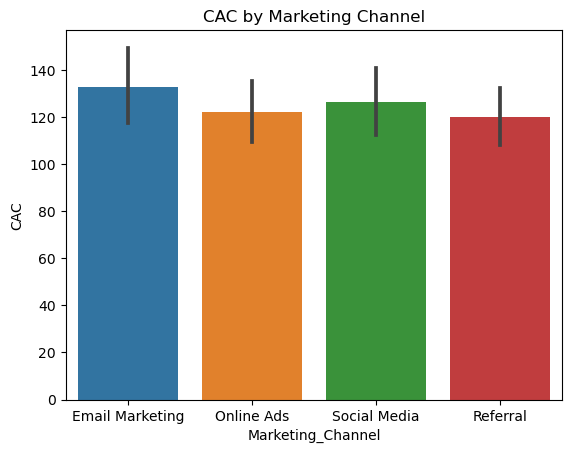

In [23]:
#CAC by Marketing Channels
sns.barplot(data=data,x='Marketing_Channel',y='CAC')
plt.title('CAC by Marketing Channel')

In [24]:
fig1 = px.bar(data, x='Marketing_Channel', 
              y='CAC', title='CAC by Marketing Channel')
fig1.show()

In [27]:
px.scatter(data,x='New_Customers',y='CAC',color='Marketing_Channel',title='New Customers VS CAC',
           trendline='ols')

In [31]:
#summary statistics of all the marketing channels
sum_stats=data.groupby('Marketing_Channel')['CAC'].describe()
sum_stats

,count,mean,std,min,25%,50%,75%,max
Marketing_Channel,,,,,,,,
Email Marketing,124.0,132.913758,89.597107,23.491784,68.226195,106.940622,177.441898,434.383446
Online Ads,130.0,122.135938,79.543793,24.784414,62.207753,97.736027,163.469540,386.751285
Referral,128.0,119.892174,74.101916,22.012364,71.347939,99.835688,137.577935,366.525209
Social Media,118.0,126.181913,77.498788,21.616453,75.633389,102.620356,167.354709,435.487346


By understanding the above summary statistics, you can:

Use the mean CAC values to compare the average cost of customer acquisition across different Marketing Channels. For example, if minimizing CAC is a priority, you may want to focus on channels with lower average CAC values.
Use the standard deviation to assess the consistency of CAC within each channel. Higher standard deviations suggest greater variability, which may require further investigation to understand the reasons behind the fluctuation in costs.
Use quartiles to understand a sense of the distribution of CAC values. For example, if you want to target cost-effective customer acquisition, you might focus on channels where the first quartile (25%) has relatively low CAC values.
Similarly, the minimum and maximum CAC values give you an idea of the range of costs associated with each channel, helping you understand the potential cost extremes.

In [33]:
#calculate the conversion rate of this marketing campaign
data['conv_rate']=data['New_Customers']/data['Marketing_Spend']*100

In [34]:
data.head()

,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers,CAC,conv_rate
0,CUST0001,Email Marketing,3489.027844,16,218.064240,0.458580
1,CUST0002,Online Ads,1107.865808,33,33.571691,2.978700
2,CUST0003,Social Media,2576.081025,44,58.547296,1.708021
3,CUST0004,Online Ads,3257.567932,32,101.798998,0.982328
4,CUST0005,Email Marketing,1108.408185,13,85.262168,1.172853


In [38]:
## Conversion Rates by Marketing Channel
px.bar(data,x='Marketing_Channel',y='conv_rate', title='Conversion rate by Marketing Channels')

Text(0.5, 1.0, 'Conversion rate by Marketing Channels')

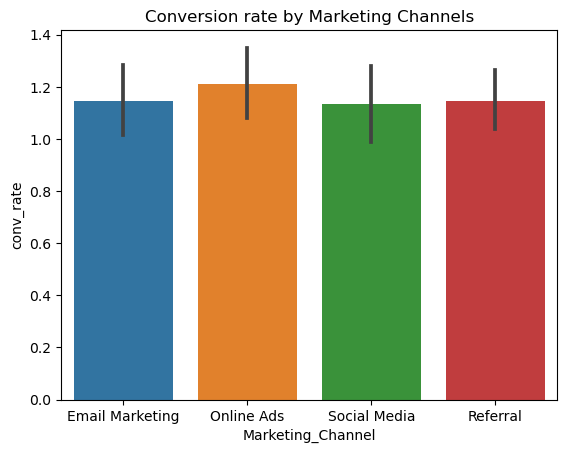

In [43]:
sns.barplot(data=data, x='Marketing_Channel',y='conv_rate')
plt.title('Conversion rate by Marketing Channels')

break-even customers for this marketing campaign. Break-even customers refer to the number of new customers that a company needs to acquire through a specific marketing channel to cover the costs associated with that marketing channel. When the actual number of new customers acquired through the channel exceeds the break-even number, it indicates that the marketing efforts are generating more revenue than the costs, resulting in a profit. Here’s how to find break-even customers for each marketing channel

In [47]:
data['br_even_cust']=data['Marketing_Spend']/data['CAC']
px.bar(data,x='Marketing_Channel',y='br_even_cust',title='Break even customer by Marketing channel')

Text(0.5, 1.0, 'Break even customer by Marketing channel')

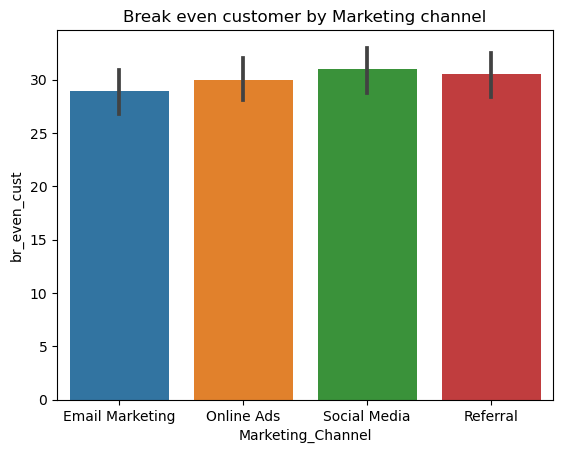

In [50]:
sns.barplot(data=data,x='Marketing_Channel',y='br_even_cust')
plt.title('Break even customer by Marketing channel')

compare the actual customers acquired with the break-even customers for each marketing channel

In [60]:
fig = go.Figure()

# Actual Customers Acquired
fig.add_trace(go.Bar(x=data['Marketing_Channel'], y=data['New_Customers'],
                     name='Actual Customers Acquired', marker_color='royalblue'))

# Break-Even Customers
fig.add_trace(go.Bar(x=data['Marketing_Channel'], y=data['br_even_cust'],
                     name='Break-Even Customers', marker_color='lightcoral'))

# Update the layout
fig.update_layout(barmode='group', title='Actual vs. Break-Even Customers by Marketing Channel',
                  xaxis_title='Marketing Channel', yaxis_title='Number of Customers')

# Show the chart
fig.show()